Saving 2. Diagnose Diabetes.xlsx to 2. Diagnose Diabetes (7).xlsx
Available sheets: ['2. Diagnose Diabetes']

🔍 Data Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

✅ Accuracy:  74.68%
✅ Precision: 63.79%
✅ Recall:    67.27%


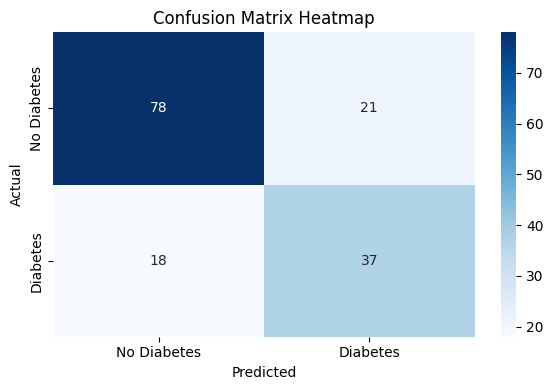

In [9]:
# ✅ STEP 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ STEP 2: Upload your dataset (CSV or Excel)
from google.colab import files
uploaded = files.upload()

# ✅ STEP 3: Read the uploaded file
import io

filename = list(uploaded.keys())[0]

# Support both .csv and .xlsx formats
if filename.endswith('.csv'):
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
elif filename.endswith('.xlsx'):
    excel_data = pd.ExcelFile(io.BytesIO(uploaded[filename]))
    print("Available sheets:", excel_data.sheet_names)
    # You can modify the sheet name here if needed
    df = excel_data.parse(excel_data.sheet_names[0])
else:
    raise ValueError("Unsupported file format. Please upload a .csv or .xlsx file.")

# ✅ STEP 4: Preview the data
print("\n🔍 Data Preview:")
print(df.head())

# ✅ STEP 5: Check for target column
if 'Outcome' not in df.columns:
    raise ValueError("The dataset must contain an 'Outcome' column (target variable).")

# ✅ STEP 6: Prepare features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# ✅ STEP 7: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 8: Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ STEP 9: Make predictions
y_pred = model.predict(X_test)

# ✅ STEP 10: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ✅ STEP 11: Display results
print(f"\n✅ Accuracy:  {accuracy * 100:.2f}%")
print(f"✅ Precision: {precision * 100:.2f}%")
print(f"✅ Recall:    {recall * 100:.2f}%")

# ✅ STEP 12: Plot confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()